In [1]:
 import pandas as pd

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/LearnPythonWithRune/MachineLearningWithPython/main/jupyter/final/files/weather.csv',parse_dates=True, index_col=0)

In [11]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Date,,,,,,,,,,,,,,,,,,,,,
2008-02-01,19.5,22.4,15.6,6.2,0.0,NaN,NaN,S,SSW,17.0,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,6.0,Yes
2008-02-02,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,6.6,Yes
2008-02-03,21.6,24.5,6.6,2.4,0.1,NaN,NaN,ESE,ESE,17.0,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,18.8,Yes
2008-02-04,20.2,22.8,18.8,2.2,0.0,NaN,NaN,NNE,E,22.0,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,77.4,Yes
2008-02-05,19.7,25.7,77.4,NaN,0.0,NaN,NaN,NNE,W,11.0,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,1.6,Yes


In [12]:
data.index

DatetimeIndex(['2008-02-01', '2008-02-02', '2008-02-03', '2008-02-04',
               '2008-02-05', '2008-02-06', '2008-02-07', '2008-02-08',
               '2008-02-09', '2008-02-10',
               ...
               '2017-06-16', '2017-06-17', '2017-06-18', '2017-06-19',
               '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
               '2017-06-24', '2017-06-25'],
              dtype='datetime64[ns]', name='Date', length=3337, freq=None)

In [13]:
dataset = data[['Humidity3pm','Pressure3pm','RainTomorrow']]

In [14]:
dataset.head()

,Humidity3pm,Pressure3pm,RainTomorrow
Date,,,
2008-02-01,84.0,1017.4,Yes
2008-02-02,73.0,1016.4,Yes
2008-02-03,86.0,1015.6,Yes
2008-02-04,90.0,1011.8,Yes
2008-02-05,74.0,1004.8,Yes


In [15]:
import matplotlib.pyplot  as plt
%matplotlib inline

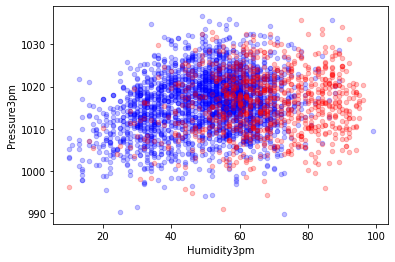

In [18]:
fig, ax = plt.subplots()
dataset[dataset['RainTomorrow'] == 'No'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='b', alpha=.25,ax=ax)
dataset[dataset['RainTomorrow'] == 'Yes'].plot.scatter(x='Humidity3pm',y='Pressure3pm',c='r', alpha=.25,ax=ax)

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [22]:
dataset_clean = dataset.dropna()
len(dataset),len(dataset_clean)

(3337, 3309)

(3337, 3309)

In [27]:
X = dataset_clean[['Humidity3pm','Pressure3pm']]
y=dataset_clean['RainTomorrow']
y= np.array([0 if value == 'No' else 1 for value in y])

In [28]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [30]:
neigh =KNeighborsClassifier()
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)
accuracy_score(y_test,y_pred)

0.8067632850241546

In [31]:
sum(y==0)/len(y)

0.7407071622846781

In [33]:
X_map = np.random.rand(10000,2)
X_map = X_map*(100,50) +(0,990)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


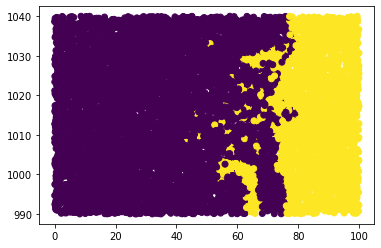

In [34]:
fig,ax=plt.subplots()
y_map = neigh.predict(X_map)
ax.scatter(x=X_map[:,0],y=X_map[:,1],c=y_map,alpha=25)

In [35]:
scores = []
for k in range(1,100):
  neigh=KNeighborsClassifier(n_neighbors=k)
  neigh.fit(X_train,y_train)
  y_pred=neigh.predict(X_test)
  score=accuracy_score(y_test,y_pred)
  scores.append(score)

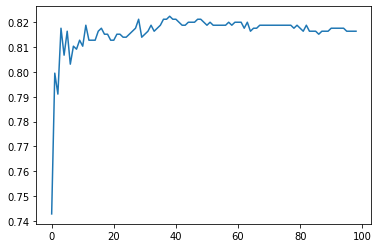

In [36]:
fig,ax = plt.subplots()
ax.plot(scores)